<a href="https://colab.research.google.com/github/yeb2Binfang/ECE-GY-9163-ML-cyber/blob/main/Lab/MLSec_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3
You must do the project individually. In this HW you will design a backdoor detector for 
BadNets trained on the YouTube Face dataset using the pruning defense discussed in 
class. Your detector will take as input:
1. B, a backdoored neural network classifier with N classes.
2. Dvalid, a validation dataset of clean, labelled images.

What you must output is G a “repaired” BadNet. G has N+1 classes, and given unseen test 
input, it must: 
1. Output the correct class if the test input is clean. The correct class will be in [1,N].
2. Output class N+1 if the input is backdoored.

You will design G using the pruning defense that we discussed in class. That is, you will prune the last convlution layer of BadNet B (the layer just before the FC layers, it should has the pooling layer after) by removing one 
channel at a time from that layer. Channels should be removed in increasing order of average activation values over the entire validation set. Every time you prune a channel, you will  measure the new validation accuracy of the new pruned badnet. You will stop pruning once the  validation accuracy drops atleast X% below the original accuracy. This will be your new 
network B'. Now, your goodnet G works as follows. For each test input, you will run it through both B and  B'. If the classification outputs are the same, i.e., class i, you will output class i. If they differ you  will output N+1. Evaluate this defense on:
1. A BadNet, B1, (“sunglasses backdoor”) on YouTube Face for which we have already  told you what the backdoor looks like. That is, we give you the validation data, and  also test data with examples of clean and backdoored inputs.

Now you must submit:
1. Your repaired networks for X={2%,4%,10%}. The repaired networks will be evaluated using the evaluation script (eval.py) on this website https://github.com/csaw-hackml/CSAW-HackML-2020. This website hosts all the information and data for the project.
2. Plot the accuracy on clean test data and the attack success rate (on backdoored test 
data) as a function of the fraction of channels pruned. 
3. Please create and submit a link to a GitHub repo. with any/all code you have produced in this project along with a Readme that tells us how to run your code and your HW report.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import keras
import sys
import h5py
import numpy as np

clean_data_filename = '/content/gdrive/MyDrive/ECE-GY 9163/Lab3/Data/clean/valid.h5'
poisoned_data_filename = '/content/gdrive/MyDrive/ECE-GY 9163/Lab3/Data/bd/bd_valid.h5'
model_filename = '/content/gdrive/MyDrive/ECE-GY 9163/Lab3/Model/bd_net.h5'

def data_loader(filepath):
    data = h5py.File(filepath, 'r')
    x_data = np.array(data['data'])
    y_data = np.array(data['label'])
    x_data = x_data.transpose((0,2,3,1))

    return x_data, y_data

def main():
    cl_x_test, cl_y_test = data_loader(clean_data_filename)
    bd_x_test, bd_y_test = data_loader(poisoned_data_filename)

    bd_model = keras.models.load_model(model_filename)

    cl_label_p = np.argmax(bd_model.predict(cl_x_test), axis=1)
    clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_test))*100
    print('Clean Classification accuracy:', clean_accuracy)
    
    bd_label_p = np.argmax(bd_model.predict(bd_x_test), axis=1)
    asr = np.mean(np.equal(bd_label_p, bd_y_test))*100
    print('Attack Success Rate:', asr)

if __name__ == '__main__':
    main()

Clean Classification accuracy: 98.64899974019225
Attack Success Rate: 100.0


In [5]:
model = keras.models.load_model(model_filename)

In [ ]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 55, 47, 3)]  0           []                               
                                                                                                  
 conv_1 (Conv2D)                (None, 52, 44, 20)   980         ['input[0][0]']                  
                                                                                                  
 pool_1 (MaxPooling2D)          (None, 26, 22, 20)   0           ['conv_1[0][0]']                 
                                                                                                  
 conv_2 (Conv2D)                (None, 24, 20, 40)   7240        ['pool_1[0][0]']                 
                                                                                            

In [ ]:
x_data, y_data = data_loader(clean_data_filename)

In [ ]:
y = model.predict(x_data[0])

In [ ]:
print(y[0])

[2.6487895e-36 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 4.8857488e-23]


In [ ]:
print(x_data.shape)

(11547, 55, 47, 3)


In [ ]:
layer_output=model_temp.get_layer('pool_3').output
intermediate_model=keras.models.Model(inputs=model_temp.input,outputs=layer_output)
intermediate_prediction=intermediate_model.predict(x_data)
print(intermediate_prediction.shape)

(11547, 5, 4, 60)


In [ ]:
temp1 = np.mean(intermediate_prediction,axis=(0,1,2))
temp1 = np.delete(temp1, 0)

In [ ]:
print(temp1.shape)

(59,)


In [ ]:
model_temp = keras.models.clone_model(model)

In [ ]:
model_temp.layers[5].get_weights()[0].shape
print(model_temp.layers[5].get_weights()[0][:,:,:,0])

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
weight_0 = model_temp.layers[5].get_weights()[0]
bias_0 = model_temp.layers[5].get_weights()[1]
weight_0[:,:,:,0] = 0
bias_0[0] = 0


[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
model_temp.layers[5].set_weights([weight_0, bias_0])

In [ ]:
print(len(out))

In [ ]:
# print(intermediate_prediction.shape)
# print(intermediate_prediction[0][0])
temp = np.mean(intermediate_prediction,axis=(1,2))
print(np.argmin(temp[0]))

0


(55, 47, 3)


(-0.5, 46.5, 54.5, -0.5)

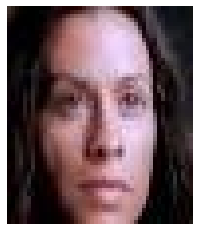

In [ ]:

plt.imshow(x_data[0]/255)
plt.axis("off")

In [ ]:
model.get_layer(name='pool_3')

AttributeError: ignored

In [ ]:
print(min(5,10))

5


In [ ]:
layer_output=model_copy.get_layer('pool_3').output.shape[3]
print(layer_output)

60


In [6]:
keras.backend.clear_session()

Official to write it

In [7]:
cl_x_test, cl_y_test = data_loader(clean_data_filename)
bd_x_test, bd_y_test = data_loader(poisoned_data_filename)

In [9]:
clean_data_acc = 98.64899974019225 # original accuracy
model_copy = keras.models.clone_model(model)
model_copy.set_weights(model.get_weights()) 
prune_index = []
clean_acc = []
asrate = []
# model_copy.get_layer('pool_3').output.shape[3])
for channel_num in tqdm(range(model_copy.get_layer('pool_3').output.shape[3])):
  min_value = 99999.9999
  min_prune_index = 0
  layer_output=model_copy.get_layer('pool_3').output
  intermediate_model=keras.models.Model(inputs=model_copy.input,outputs=layer_output)
  intermediate_prediction=intermediate_model.predict(cl_x_test)  
  temp = np.mean(intermediate_prediction,axis=(0,1,2))
  for index, value in enumerate(temp):
    if index not in prune_index:
      min_value = min(min_value, value)
      min_prune_index = index
  prune_index.append(min_prune_index)
  # index = 5 means 'pool_3'
  weight_0 = model_copy.layers[5].get_weights()[0]
  bias_0 = model_copy.layers[5].get_weights()[1]
  weight_0[:,:,:,min_prune_index] = 0
  bias_0[min_prune_index] = 0
  model_copy.layers[5].set_weights([weight_0, bias_0])
  cl_label_p = np.argmax(model_copy.predict(cl_x_test), axis=1)
  clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_test))*100
  if (clean_data_acc-clean_accuracy <= 2):
    model_copy.save('model_X=2.h5')
  if ((clean_data_acc-clean_accuracy) <= 6 and (clean_data_acc-clean_accuracy) >= 4):
    model_copy.save('model_X=4.h5')
  if ((clean_data_acc-clean_accuracy) <= 10 and (clean_data_acc-clean_accuracy) > 6):
    model_copy.save('model_X=10.h5')
  clean_acc.append(clean_accuracy)
  print(clean_accuracy)
  bd_label_p = np.argmax(model_copy.predict(bd_x_test), axis=1)
  asr = np.mean(np.equal(bd_label_p, bd_y_test))*100
  asrate.append(asr)
  keras.backend.clear_session()

  0%|          | 0/60 [00:00<?, ?it/s]

98.64899974019225


  2%|▏         | 1/60 [00:21<20:44, 21.10s/it]

98.63167922404088


  3%|▎         | 2/60 [00:49<24:28, 25.33s/it]

94.09370399237898


  5%|▌         | 3/60 [01:13<23:37, 24.88s/it]

92.98519095869057


  7%|▋         | 4/60 [01:41<24:26, 26.19s/it]

92.98519095869057


  8%|▊         | 5/60 [02:02<22:18, 24.34s/it]

90.69888282670824


 10%|█         | 6/60 [02:27<21:56, 24.38s/it]

90.69888282670824


 12%|█▏        | 7/60 [02:55<22:34, 25.56s/it]

65.09915995496665


 13%|█▎        | 8/60 [03:23<22:44, 26.24s/it]

65.08183943881528


 15%|█▌        | 9/60 [03:51<22:51, 26.90s/it]

65.08183943881528


 17%|█▋        | 10/60 [04:18<22:19, 26.79s/it]

65.08183943881528


 18%|█▊        | 11/60 [04:49<23:03, 28.24s/it]

65.08183943881528


 20%|██        | 12/60 [05:17<22:37, 28.28s/it]

65.08183943881528


 22%|██▏       | 13/60 [05:49<22:56, 29.30s/it]

62.21529401576167


 23%|██▎       | 14/60 [06:13<21:11, 27.64s/it]

62.21529401576167


 25%|██▌       | 15/60 [06:40<20:30, 27.34s/it]

62.21529401576167


 27%|██▋       | 16/60 [07:06<19:46, 26.97s/it]

61.59175543431195


 28%|██▊       | 17/60 [07:37<20:16, 28.30s/it]

59.66051788343293


 30%|███       | 18/60 [08:03<19:24, 27.72s/it]

59.66051788343293


 32%|███▏      | 19/60 [08:32<19:04, 27.92s/it]

59.66051788343293


 33%|███▎      | 20/60 [08:56<17:48, 26.72s/it]

59.66051788343293


 35%|███▌      | 21/60 [09:19<16:47, 25.83s/it]

59.66051788343293


 37%|███▋      | 22/60 [09:48<16:56, 26.74s/it]

59.66051788343293


 38%|███▊      | 23/60 [10:18<16:58, 27.52s/it]

59.66051788343293


 40%|████      | 24/60 [10:44<16:12, 27.02s/it]

37.195808435091365


 42%|████▏     | 25/60 [11:10<15:39, 26.85s/it]

37.195808435091365


 43%|████▎     | 26/60 [11:38<15:29, 27.34s/it]

37.195808435091365


 45%|████▌     | 27/60 [12:07<15:12, 27.64s/it]

37.22178920931844


 47%|████▋     | 28/60 [12:29<13:49, 25.92s/it]

37.22178920931844


 48%|████▊     | 29/60 [12:57<13:44, 26.60s/it]

37.22178920931844


 50%|█████     | 30/60 [13:22<13:00, 26.02s/it]

34.285961721659305


 52%|█████▏    | 31/60 [13:46<12:22, 25.59s/it]

26.79483848618689


 53%|█████▎    | 32/60 [14:11<11:48, 25.29s/it]

26.79483848618689


 55%|█████▌    | 33/60 [14:40<11:52, 26.38s/it]

26.79483848618689


 57%|█████▋    | 34/60 [15:08<11:39, 26.91s/it]

26.79483848618689


 58%|█████▊    | 35/60 [15:36<11:22, 27.30s/it]

26.79483848618689


 60%|██████    | 36/60 [16:07<11:24, 28.53s/it]

26.786178228111197


 62%|██████▏   | 37/60 [16:29<10:06, 26.35s/it]

26.786178228111197


 63%|██████▎   | 38/60 [16:57<09:55, 27.06s/it]

26.54369100199186


 65%|██████▌   | 39/60 [17:26<09:35, 27.41s/it]

25.660344678271414


 67%|██████▋   | 40/60 [17:57<09:34, 28.73s/it]

25.599722871741577


 68%|██████▊   | 41/60 [18:26<09:02, 28.58s/it]

25.036806096821685


 70%|███████   | 42/60 [18:57<08:51, 29.55s/it]

25.036806096821685


 72%|███████▏  | 43/60 [19:19<07:40, 27.08s/it]

21.763228544210616


 73%|███████▎  | 44/60 [19:44<07:04, 26.53s/it]

21.763228544210616


 75%|███████▌  | 45/60 [20:05<06:13, 24.90s/it]

21.763228544210616


 77%|███████▋  | 46/60 [20:30<05:46, 24.76s/it]

21.763228544210616


 78%|███████▊  | 47/60 [21:01<05:47, 26.76s/it]

21.763228544210616


 80%|████████  | 48/60 [21:32<05:37, 28.15s/it]

16.541092924569153


 82%|████████▏ | 49/60 [21:57<04:58, 27.16s/it]

7.612366848532086


 83%|████████▎ | 50/60 [22:29<04:44, 28.45s/it]

7.612366848532086


 85%|████████▌ | 51/60 [22:53<04:05, 27.25s/it]

5.897635749545336


 87%|████████▋ | 52/60 [23:18<03:32, 26.56s/it]

2.052481163938685


 88%|████████▊ | 53/60 [23:46<03:09, 27.05s/it]

2.052481163938685


 90%|█████████ | 54/60 [24:07<02:31, 25.27s/it]

0.8140642591149216


 92%|█████████▏| 55/60 [24:40<02:17, 27.50s/it]

0.36373083917900756


 93%|█████████▎| 56/60 [25:09<01:51, 27.78s/it]

0.1385641292110505


 95%|█████████▌| 57/60 [25:34<01:21, 27.02s/it]

0.1385641292110505


 97%|█████████▋| 58/60 [25:59<00:52, 26.44s/it]

0.0779423226812159


 98%|█████████▊| 59/60 [26:27<00:26, 26.95s/it]

0.0779423226812159


100%|██████████| 60/60 [26:55<00:00, 26.93s/it]


In [10]:
print(clean_acc)
print(asrate)

[98.64899974019225, 98.63167922404088, 94.09370399237898, 92.98519095869057, 92.98519095869057, 90.69888282670824, 90.69888282670824, 65.09915995496665, 65.08183943881528, 65.08183943881528, 65.08183943881528, 65.08183943881528, 65.08183943881528, 62.21529401576167, 62.21529401576167, 62.21529401576167, 61.59175543431195, 59.66051788343293, 59.66051788343293, 59.66051788343293, 59.66051788343293, 59.66051788343293, 59.66051788343293, 59.66051788343293, 37.195808435091365, 37.195808435091365, 37.195808435091365, 37.22178920931844, 37.22178920931844, 37.22178920931844, 34.285961721659305, 26.79483848618689, 26.79483848618689, 26.79483848618689, 26.79483848618689, 26.79483848618689, 26.786178228111197, 26.786178228111197, 26.54369100199186, 25.660344678271414, 25.599722871741577, 25.036806096821685, 25.036806096821685, 21.763228544210616, 21.763228544210616, 21.763228544210616, 21.763228544210616, 21.763228544210616, 16.541092924569153, 7.612366848532086, 7.612366848532086, 5.897635749545

Text(0.5, 0, 'fraction of pruned channels')

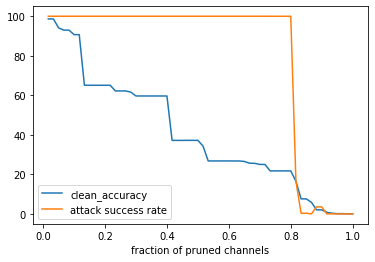

In [15]:
x_axis = np.arange(1,61)/60
plt.plot(x_axis,clean_acc)
plt.plot(x_axis,asrate)
plt.legend(['clean_accuracy','attack success rate'])
plt.xlabel("fraction of pruned channels")

In [ ]:

model_copy = keras.models.clone_model(model)
model_copy.set_weights(model.get_weights()) 
# cl_label_p = np.argmax(model_copy.predict(cl_x_test), axis=1)
# clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_test))*100
# print(clean_accuracy)

In [ ]:
model_copy.save('my_model=2.h5')